In [1]:
import requests
import pandas as pd
import numpy as np
import datetime

import websocket
import json

from binance.client import Client
import plotly.express as px
import plotly.graph_objs as go
import ccxt

In [2]:
# Binance Spot Test Network: https://testnet.binance.vision/
# API Key: odwF9bVsSsxjZnckgbSu3NfUgGqqJ2sow4OelwjEttIBB08r3Z5umQL0A03lp2Gd
# Secret key: Q3bcPKvbvlVpzv5BQe3lj7EkWdRhevEp24Oi7TENce6xO0FiXUNQKDa47QTyyKcK

In [3]:
exchange = ccxt.binance({
    'apiKey': 'odwF9bVsSsxjZnckgbSu3NfUgGqqJ2sow4OelwjEttIBB08r3Z5umQL0A03lp2Gd',
    'secret': 'Q3bcPKvbvlVpzv5BQe3lj7EkWdRhevEp24Oi7TENce6xO0FiXUNQKDa47QTyyKcK',
})
exchange.set_sandbox_mode(True)
rate_limit = exchange.rateLimit
exchange.load_markets();
print(exchange.fetchBalance())

# Get Bitcoin's OHLCV (Open, High, Low, Close, Volume) data
ohlcv = exchange.fetch_ohlcv('BTC/USDT', timeframe='1h')

# Convert the OHLCV data into a Pandas DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

# Print the last few rows of the DataFrame
print(df.tail())

{'info': {'makerCommission': '0', 'takerCommission': '0', 'buyerCommission': '0', 'sellerCommission': '0', 'commissionRates': {'maker': '0.00000000', 'taker': '0.00000000', 'buyer': '0.00000000', 'seller': '0.00000000'}, 'canTrade': True, 'canWithdraw': False, 'canDeposit': False, 'brokered': False, 'requireSelfTradePrevention': False, 'updateTime': '1680672039350', 'accountType': 'SPOT', 'balances': [{'asset': 'BNB', 'free': '1000.00000000', 'locked': '0.00000000'}, {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}, {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'}, {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'}, {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'}, {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}], 'permissions': ['SPOT']}, 'BNB': {'free': 1000.0, 'used'

In [4]:
exchange.fetch_ticker('BTC/USDT')['last']

27453.97

In [5]:
import json
import websocket
import time

base_url = 'wss://testnet.binance.vision/ws'
bitcoin = '/btcusdt@ticker'

df = pd.DataFrame(columns={})

def on_message(ws, message):
    data = json.loads(message)
    price = data['c']
    print(f"Current Bitcoin price: {price}")

def on_error(ws, error):
    print(error)

def on_close(ws):
    print("Connection closed")

def on_open(ws):
    print("Connection opened")

if __name__ == "__main__":
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp(base_url + bitcoin, on_open=on_open, on_message=on_message, on_error=on_error, on_close=on_close)
    ws.run_forever()
    time.sleep(5) # Wait for 10 seconds
    ws.close() # Close the WebSocket connection


--- request header ---
GET /ws/btcusdt@ticker HTTP/1.1
Upgrade: websocket
Host: testnet.binance.vision
Origin: https://testnet.binance.vision
Sec-WebSocket-Key: iUuB2fjO3KHFimKPhmgoZw==
Sec-WebSocket-Version: 13
Connection: Upgrade


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Connection: upgrade
Date: Sun, 23 Apr 2023 20:12:44 GMT
Upgrade: websocket
Sec-WebSocket-Accept: kgCQAOLp0xO2Zpw6a7FD9VcQHAI=
X-Cache: Miss from cloudfront
Via: 1.1 367a4718be97a49df7ac0500a986437a.cloudfront.net (CloudFront)
X-Amz-Cf-Pop: FRA56-P2
X-Amz-Cf-Id: _kgGEHtAuWLiilDwdkJBbZftGGoPvOhLW1TSgwHyteSBpQ8Z6jyetw==
-----------------------
Websocket connected


Connection opened


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280766074,"s":"BTCUSDT","p":"-194.62000000","P":"-0.704","w":"27598.62551724","x":"27649.35000000","c":"27454.73000000","Q":"0.01679400","b":"27454.66000000","B":"0.08379900","a":"27454.73000000","A":"0.06843800","o":"27649.35000000","h":"27878.08000000","l":"27296.17000000","v":"4329.35119200","q":"119484142.28063885","O":1682194366074,"C":1682280766074,"F":2836393,"L":2973560,"n":137168}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280766074,"s":"BTCUSDT","p":"-194.62000000","P":"-0.704","w":"27598.62551724","x":"27649.35000000","c":"27454.73000000","Q":"0.01679400","b":"27454.66000000","B":"0.08379900","a":"27454.73000000","A":"0.06843800","o":"27649.35000000","h":"27878.08000000","l":"27296.17000000","v":"4329.35119200","q":"119484142.28063885","O":1682194366074,"C":1682280766074,"F":2836393,"L":2973560,"n":137168}'


Current Bitcoin price: 27454.73000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280766415,"s":"BTCUSDT","p":"-194.63000000","P":"-0.704","w":"27598.62550904","x":"27649.35000000","c":"27454.73000000","Q":"0.01679400","b":"27454.66000000","B":"0.08379900","a":"27454.67000000","A":"0.08778200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.35049200","q":"119484122.92609385","O":1682194366415,"C":1682280766415,"F":2836394,"L":2973560,"n":137167}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280766415,"s":"BTCUSDT","p":"-194.63000000","P":"-0.704","w":"27598.62550904","x":"27649.35000000","c":"27454.73000000","Q":"0.01679400","b":"27454.66000000","B":"0.08379900","a":"27454.67000000","A":"0.08778200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.35049200","q":"119484122.92609385","O":1682194366415,"C":1682280766415,"F":2836394,"L":2973560,"n":137167}'


Current Bitcoin price: 27454.73000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280772162,"s":"BTCUSDT","p":"-194.69000000","P":"-0.704","w":"27598.62546759","x":"27649.36000000","c":"27454.67000000","Q":"0.00100000","b":"27454.66000000","B":"0.08379900","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.35079200","q":"119484131.02621185","O":1682194372162,"C":1682280772162,"F":2836395,"L":2973561,"n":137167}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280772162,"s":"BTCUSDT","p":"-194.69000000","P":"-0.704","w":"27598.62546759","x":"27649.36000000","c":"27454.67000000","Q":"0.00100000","b":"27454.66000000","B":"0.08379900","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.35079200","q":"119484131.02621185","O":1682194372162,"C":1682280772162,"F":2836395,"L":2973561,"n":137167}'


Current Bitcoin price: 27454.67000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280774508,"s":"BTCUSDT","p":"-194.69000000","P":"-0.704","w":"27598.62466131","x":"27649.36000000","c":"27454.66000000","Q":"0.02400000","b":"27454.66000000","B":"0.05979900","a":"27454.67000000","A":"0.08678200","o":"27649.35000000","h":"27878.08000000","l":"27296.17000000","v":"4329.37409200","q":"119484770.58349985","O":1682194374508,"C":1682280774508,"F":2836396,"L":2973562,"n":137167}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280774508,"s":"BTCUSDT","p":"-194.69000000","P":"-0.704","w":"27598.62466131","x":"27649.36000000","c":"27454.66000000","Q":"0.02400000","b":"27454.66000000","B":"0.05979900","a":"27454.67000000","A":"0.08678200","o":"27649.35000000","h":"27878.08000000","l":"27296.17000000","v":"4329.37409200","q":"119484770.58349985","O":1682194374508,"C":1682280774508,"F":2836396,"L":2973562,"n":137167}'


Current Bitcoin price: 27454.66000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280776028,"s":"BTCUSDT","p":"-194.70000000","P":"-0.704","w":"27598.62453207","x":"27649.35000000","c":"27454.66000000","Q":"0.02764000","b":"27454.66000000","B":"0.05615900","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.37703200","q":"119484851.16391725","O":1682194376028,"C":1682280776028,"F":2836397,"L":2973563,"n":137167}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280776028,"s":"BTCUSDT","p":"-194.70000000","P":"-0.704","w":"27598.62453207","x":"27649.35000000","c":"27454.66000000","Q":"0.02764000","b":"27454.66000000","B":"0.05615900","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.37703200","q":"119484851.16391725","O":1682194376028,"C":1682280776028,"F":2836397,"L":2973563,"n":137167}'


Current Bitcoin price: 27454.66000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280777543,"s":"BTCUSDT","p":"-194.70000000","P":"-0.704","w":"27598.62441096","x":"27649.35000000","c":"27454.66000000","Q":"0.03128200","b":"27454.66000000","B":"0.05251700","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.38067400","q":"119484951.15378897","O":1682194377542,"C":1682280777542,"F":2836397,"L":2973564,"n":137168}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280777543,"s":"BTCUSDT","p":"-194.70000000","P":"-0.704","w":"27598.62441096","x":"27649.35000000","c":"27454.66000000","Q":"0.03128200","b":"27454.66000000","B":"0.05251700","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.38067400","q":"119484951.15378897","O":1682194377542,"C":1682280777542,"F":2836397,"L":2973564,"n":137168}'


Current Bitcoin price: 27454.66000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280780283,"s":"BTCUSDT","p":"-194.70000000","P":"-0.704","w":"27598.62242692","x":"27649.36000000","c":"27454.66000000","Q":"0.03182800","b":"27454.66000000","B":"0.05197100","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.21353100","q":"119480329.64760080","O":1682194380282,"C":1682280780282,"F":2836402,"L":2973565,"n":137164}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280780283,"s":"BTCUSDT","p":"-194.70000000","P":"-0.704","w":"27598.62242692","x":"27649.36000000","c":"27454.66000000","Q":"0.03182800","b":"27454.66000000","B":"0.05197100","a":"27454.67000000","A":"0.08678200","o":"27649.36000000","h":"27878.08000000","l":"27296.17000000","v":"4329.21353100","q":"119480329.64760080","O":1682194380282,"C":1682280780282,"F":2836402,"L":2973565,"n":137164}'


Current Bitcoin price: 27454.66000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280780774,"s":"BTCUSDT","p":"-194.67000000","P":"-0.704","w":"27598.61455617","x":"27649.40000000","c":"27454.73000000","Q":"0.02621800","b":"27454.62000000","B":"0.03678000","a":"27454.73000000","A":"0.04222000","o":"27649.40000000","h":"27878.08000000","l":"27296.17000000","v":"4329.44617300","q":"119486716.17030876","O":1682194380774,"C":1682280780774,"F":2836405,"L":2973575,"n":137171}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280780774,"s":"BTCUSDT","p":"-194.67000000","P":"-0.704","w":"27598.61455617","x":"27649.40000000","c":"27454.73000000","Q":"0.02621800","b":"27454.62000000","B":"0.03678000","a":"27454.73000000","A":"0.04222000","o":"27649.40000000","h":"27878.08000000","l":"27296.17000000","v":"4329.44617300","q":"119486716.17030876","O":1682194380774,"C":1682280780774,"F":2836405,"L":2973575,"n":137171}'


Current Bitcoin price: 27454.73000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280781415,"s":"BTCUSDT","p":"-194.66000000","P":"-0.704","w":"27598.61382947","x":"27649.40000000","c":"27454.73000000","Q":"0.02621800","b":"27454.62000000","B":"0.03678000","a":"27454.67000000","A":"0.07394100","o":"27649.39000000","h":"27878.08000000","l":"27296.17000000","v":"4329.38422300","q":"119485003.28997876","O":1682194381415,"C":1682280781415,"F":2836411,"L":2973575,"n":137165}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280781415,"s":"BTCUSDT","p":"-194.66000000","P":"-0.704","w":"27598.61382947","x":"27649.40000000","c":"27454.73000000","Q":"0.02621800","b":"27454.62000000","B":"0.03678000","a":"27454.67000000","A":"0.07394100","o":"27649.39000000","h":"27878.08000000","l":"27296.17000000","v":"4329.38422300","q":"119485003.28997876","O":1682194381415,"C":1682280781415,"F":2836411,"L":2973575,"n":137165}'


Current Bitcoin price: 27454.73000000


++Rcv raw: b'\x81~\x01\xa2{"e":"24hrTicker","E":1682280782409,"s":"BTCUSDT","p":"-194.73000000","P":"-0.704","w":"27598.61362997","x":"27649.40000000","c":"27454.66000000","Q":"0.00600000","b":"27454.66000000","B":"0.09453000","a":"27454.67000000","A":"0.07394100","o":"27649.39000000","h":"27878.08000000","l":"27296.17000000","v":"4329.39022300","q":"119485168.01793876","O":1682194382408,"C":1682280782408,"F":2836411,"L":2973576,"n":137166}'
++Rcv decoded: fin=1 opcode=1 data=b'{"e":"24hrTicker","E":1682280782409,"s":"BTCUSDT","p":"-194.73000000","P":"-0.704","w":"27598.61362997","x":"27649.40000000","c":"27454.66000000","Q":"0.00600000","b":"27454.66000000","B":"0.09453000","a":"27454.67000000","A":"0.07394100","o":"27649.39000000","h":"27878.08000000","l":"27296.17000000","v":"4329.39022300","q":"119485168.01793876","O":1682194382408,"C":1682280782408,"F":2836411,"L":2973576,"n":137166}'
++Sent raw: b'\x88\x82D~\xf7qG\x96'
++Sent decoded: fin=1 opcode=8 data=b'\x03\xe8'


Current Bitcoin price: 27454.66000000



error from callback <function on_close at 0x7f1e3a707490>: on_close() takes 1 positional argument but 3 were given


on_close() takes 1 positional argument but 3 were given


KeyboardInterrupt: 

In [10]:
%run 'init.ipynb'

/tmp/ipykernel_2488783/3608055759.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_stocks = all_stocks.append([aapl, tsla, pypl]).sort_index()


In [12]:

api_key='sN8B8IP18Sba4xi7X5aX2TaQtxMu8zxr5o2FkPxZvZBDXwwFT7Sl9VYzeILh4bCi'
api_secret='3BObFKszldGkDE9GjFe9YQpwPr0i0JJWVUGsU3EWR7KwDUCucDoVNl0GQwiOolkG'


In [13]:
def volatility():
    return 0
test = aapl_days[0]#.set_index('Hour')

In [14]:
new_test = aapl_days[0]
new_test

Hour                 Time      Open      High  \
Day        Ticker                                                      
2021-08-02 AAPL    09:00:00  2021-08-02 09:00:00  146.3607  146.4606   
           AAPL    09:01:00  2021-08-02 09:01:00  146.4506  146.5404   
           AAPL    09:02:00  2021-08-02 09:02:00  146.5005  146.5305   
           AAPL    09:03:00  2021-08-02 09:03:00  146.5404  146.5604   
           AAPL    09:04:00  2021-08-02 09:04:00  146.5205  146.5604   
...                     ...                  ...       ...       ...   
           AAPL    15:55:00  2021-08-02 15:55:00  145.3772  145.3822   
           AAPL    15:56:00  2021-08-02 15:56:00  145.2923  145.3273   
           AAPL    15:57:00  2021-08-02 15:57:00  145.2424  145.3123   
           AAPL    15:58:00  2021-08-02 15:58:00  145.3023  145.3023   
           AAPL    15:59:00  2021-08-02 15:59:00  145.2474  145.3323   

                        Low     Close  Volume  
Day        Ticker                              
2021-08-02 AAPL    146.3607  146.4606    6475  
           AAPL    146.4007  146.5005   20827  
           AAPL    146.4805  146.5305    4227  
           AAPL    146.5105  146.5205    3198  
           AAPL    146.5205  146.5604    3503  
...                     ...       ...     ...  
           AAPL    145.2873  145.2923  216938  
           AAPL    145.2424  145.2523  237200  
           AAPL    145.2324  145.3122  259082  
           AAPL    145.2424  145.2424  192529  
           AAPL    145.1525  145.3023  648594  

[420 rows x 7 columns]

In [15]:
new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100

/tmp/ipykernel_2488783/1887359404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100


In [16]:
new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100

/tmp/ipykernel_2488783/1887359404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Pct Change'] = ((new_test['Open'].loc[:] - new_test['Open'].loc[:].shift(1)) / new_test['Open'].loc[:].shift(1)) * 100


In [17]:
new_test['Pct Change'].mean()

-0.001811202504217415

In [18]:
test[['Open', 'Hour']].apply(func=lambda x: (x.iloc[3::6] - x.iloc[::6]) / x.iloc[::6] * 100, axis=1)

Open
Day        Ticker      
2021-08-02 AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
...                 ...
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN
           AAPL     NaN

[420 rows x 1 columns]

### Write a for loop that trades on each day in a stock array and calculates how much profit would be made using certain algorithms

* How far you deviate from a day's average should justify trading
* If you are deviating a lot up, short, if deviating down, buy
* The change every 3 minutes averages to 0
* Volume affects how quickly the Open price changes - low volume means prices stay stagnant
* Maybe only trade when volume is high enough to create volatility

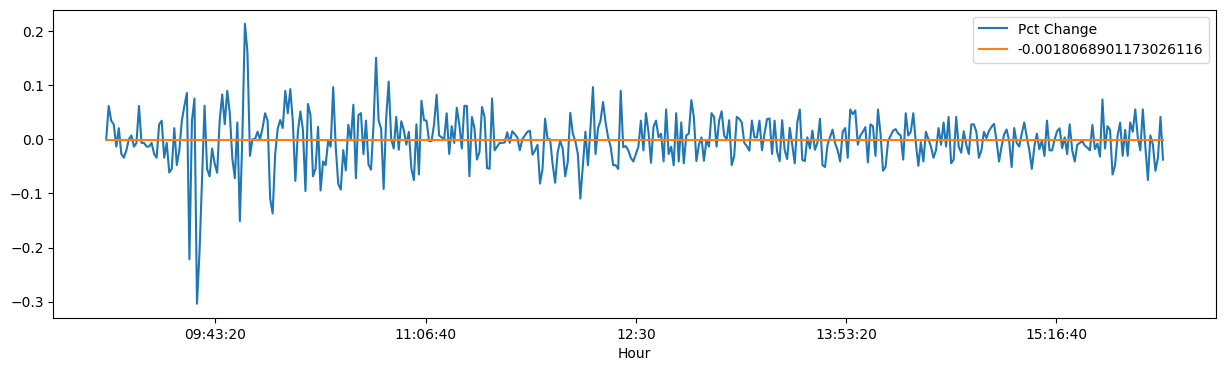

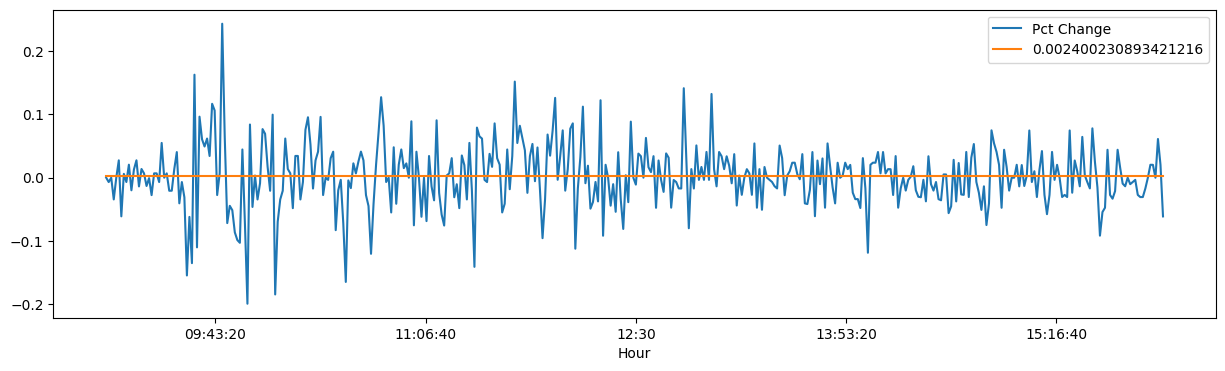

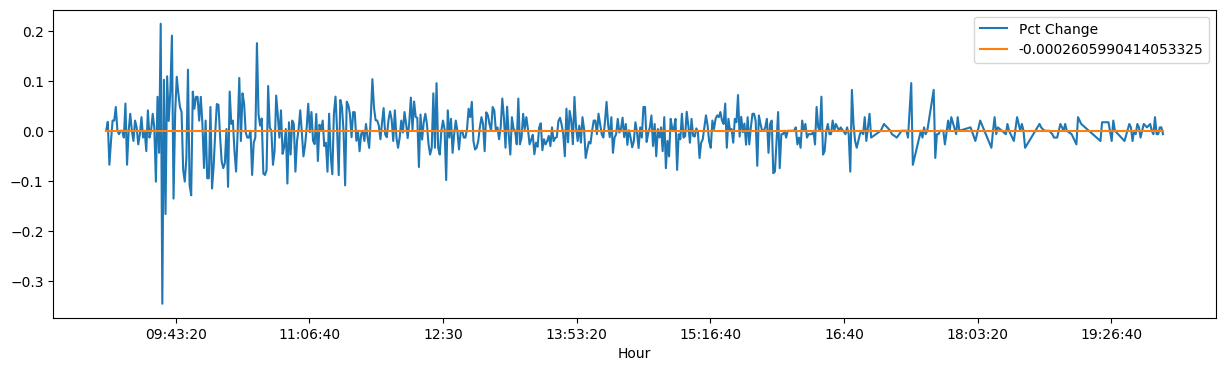

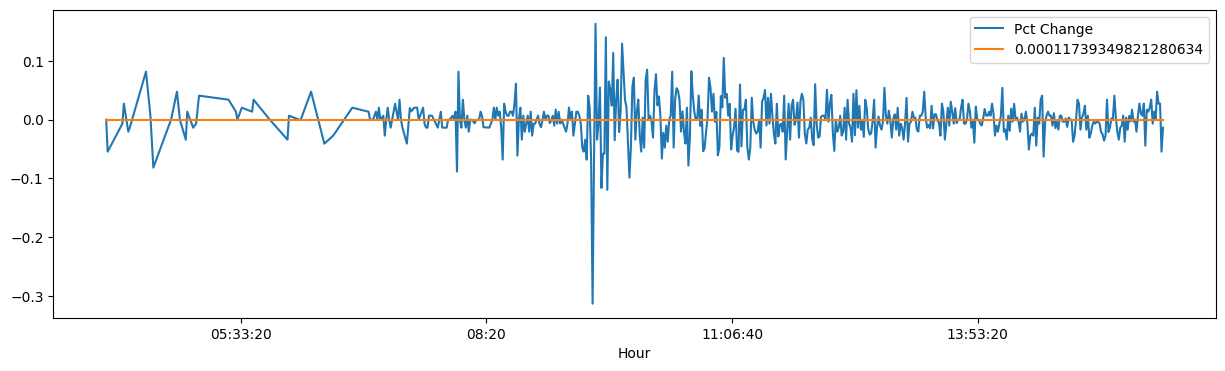

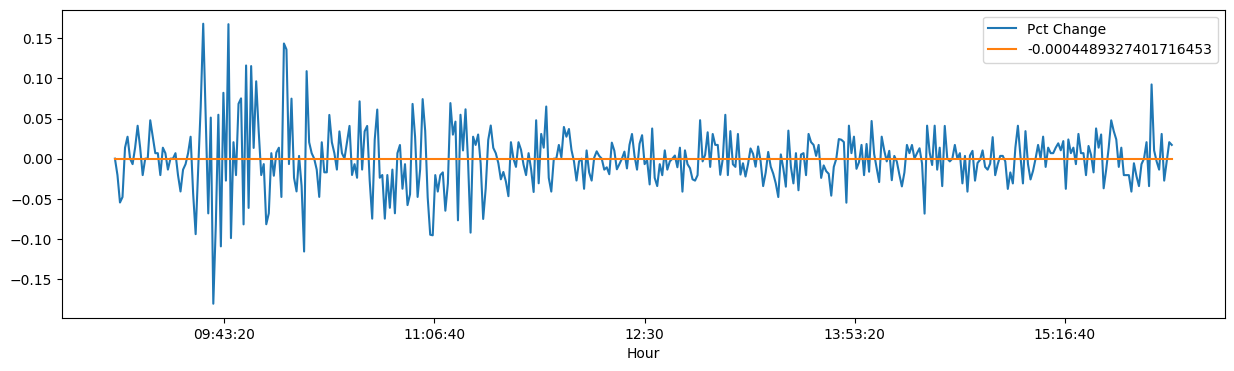

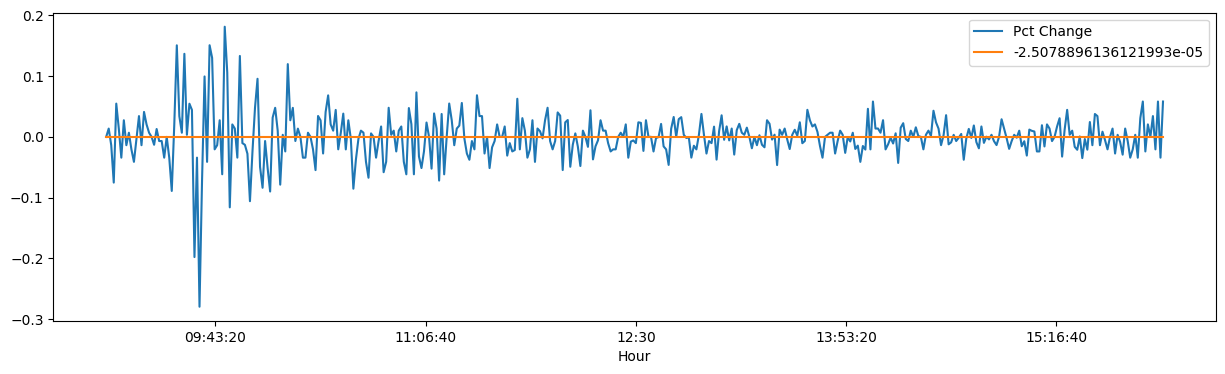

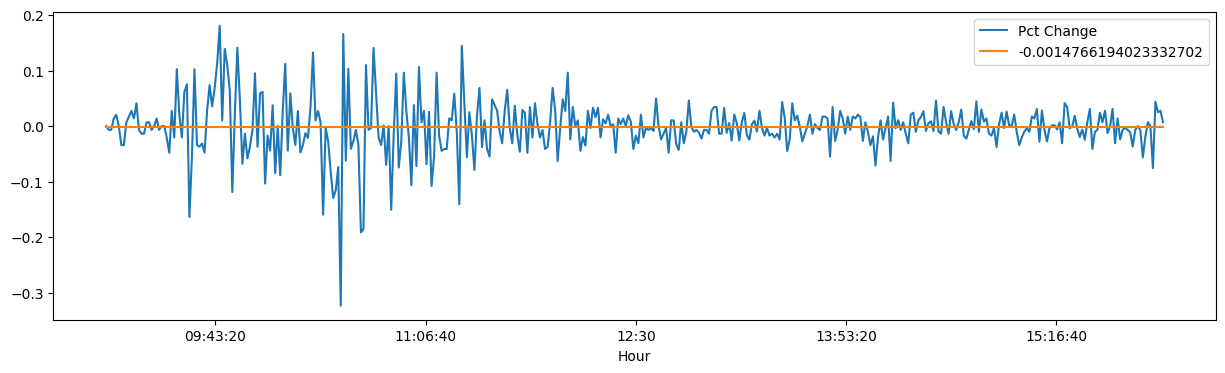

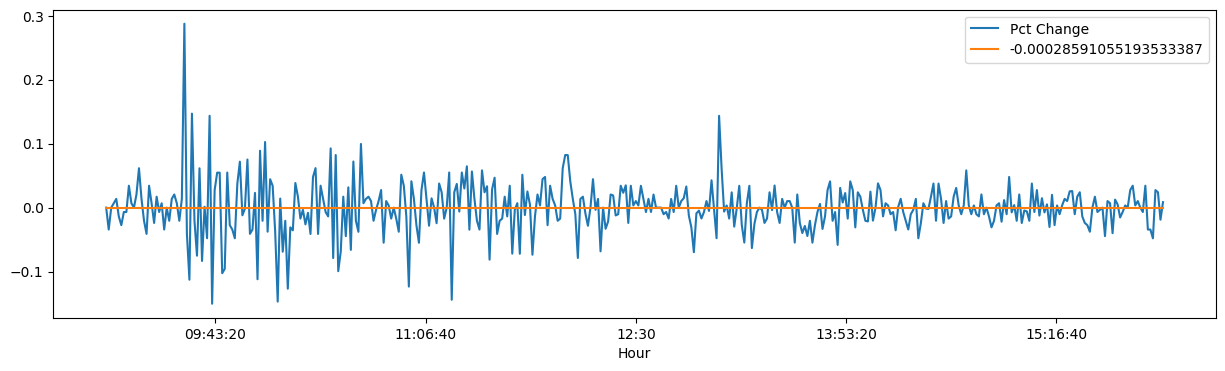

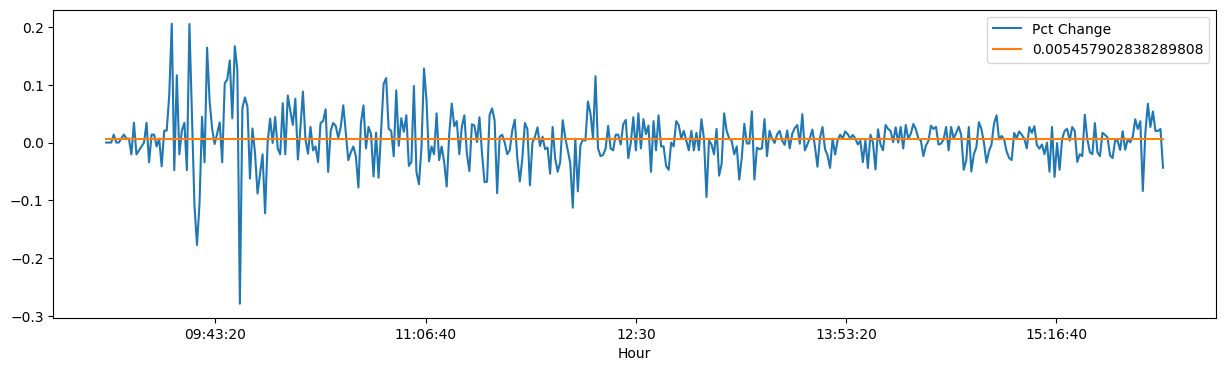

In [19]:
# Check one minute
# 1 min average: should be done every 1 minute in real-time
for tmp in aapl_days:
    day = tmp.loc[:]
    # percent change every 1 minute
    day['Pct Change'] = (((day.loc[:, 'Open'] - day.loc[:, 'Open'].shift(1)) / day.loc[:,'Open'].shift(1)) * 100).fillna(0)
    day['Average'] = day.loc[:,'Pct Change'].mean()

    # Calculate mean for each day and plot
    ax = day.plot('Hour', 'Pct Change')
    day.plot('Hour', 'Average', ax=ax, figsize=(15,4))
    ax.legend(['Pct Change', day['Average'][0]])

In [20]:
if last_3_min_pct_change > 0.008:
    last_price = current_price
    buy(x_amt) 
    when price == amt_other_direction
if current_price == last_price:
    sell(x_amt)

SyntaxError: invalid syntax (4241692201.py, line 4)

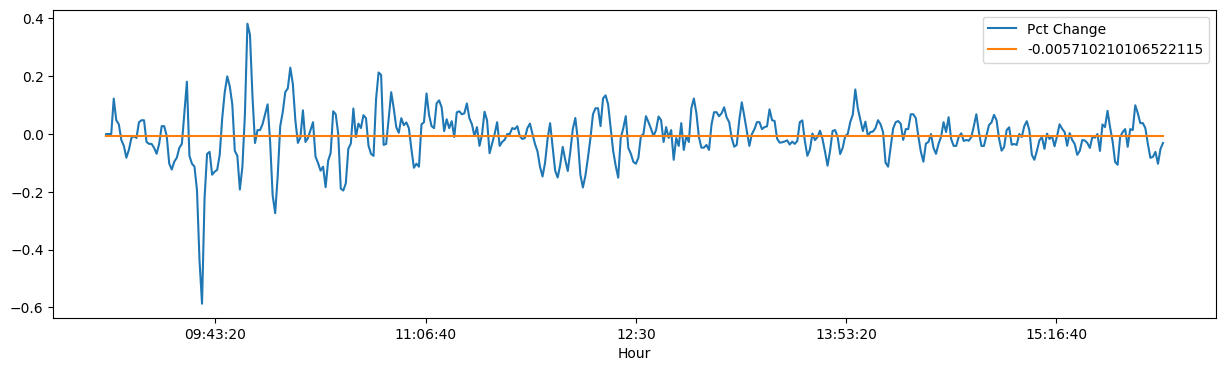

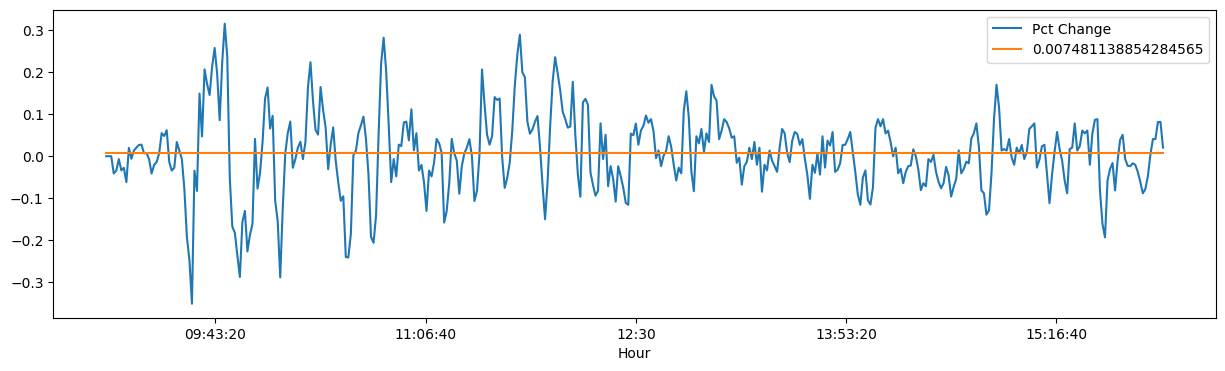

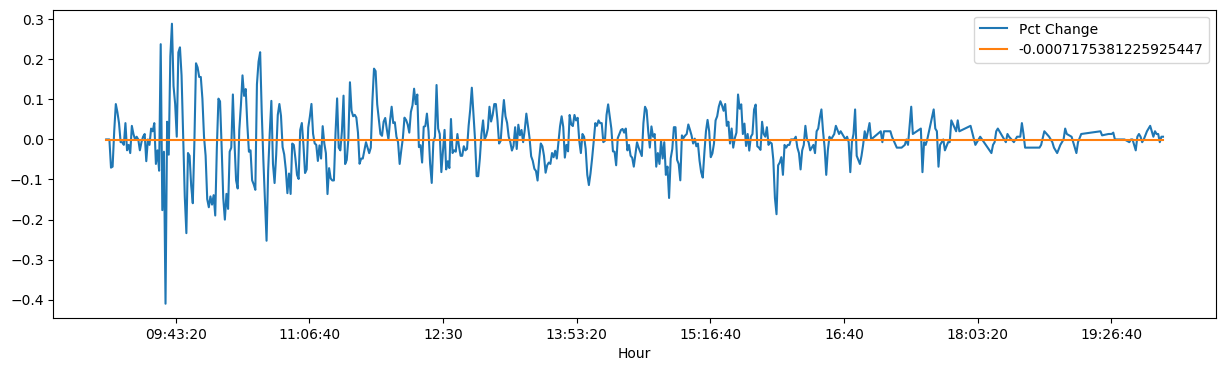

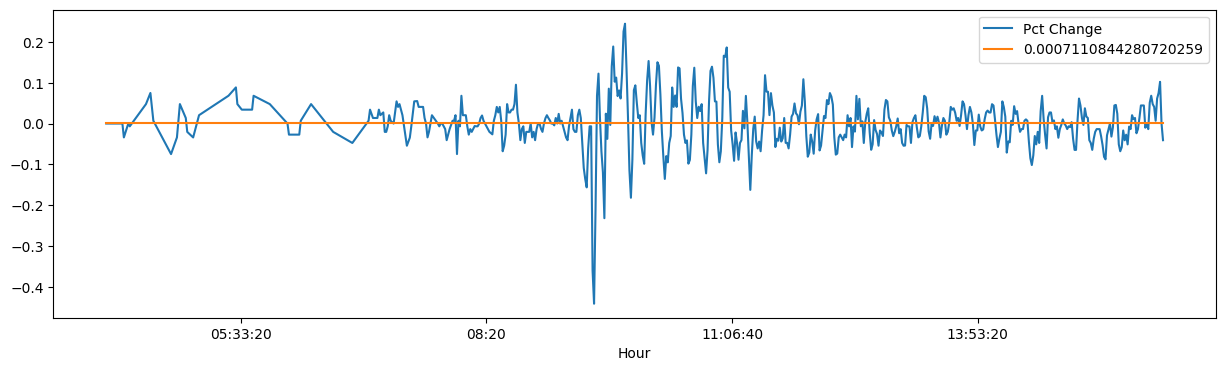

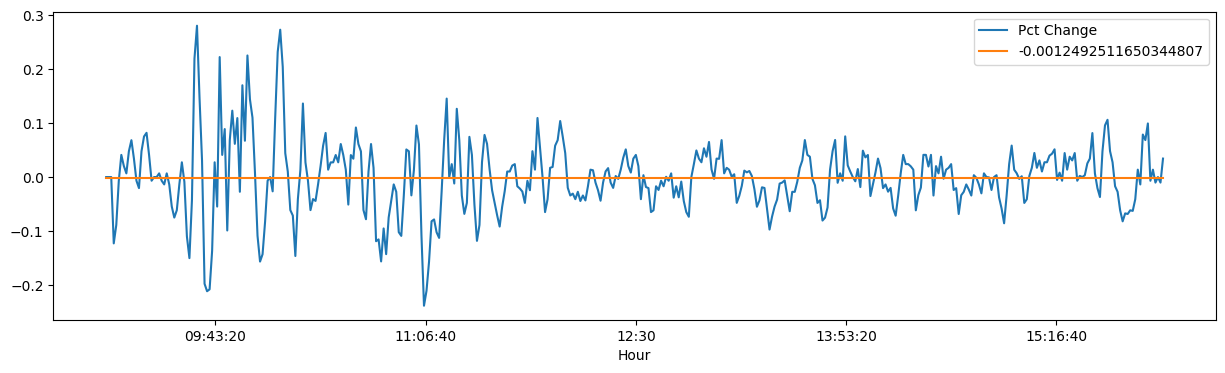

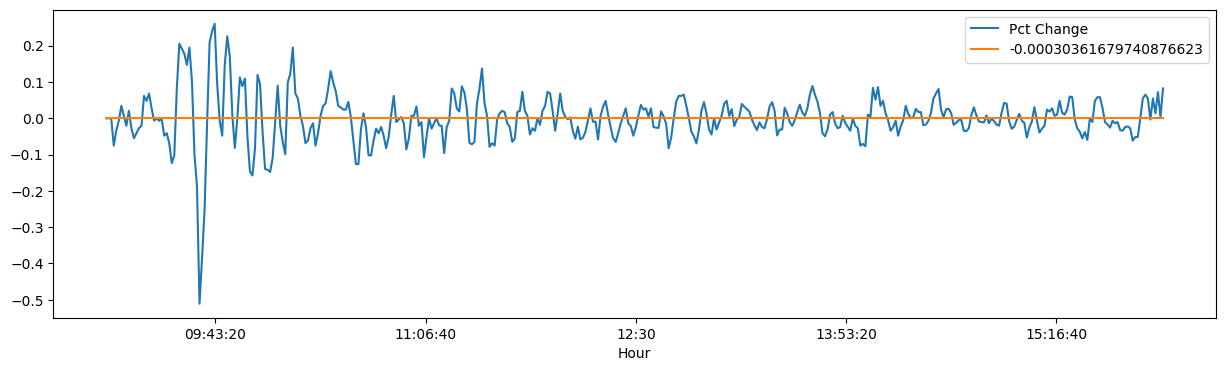

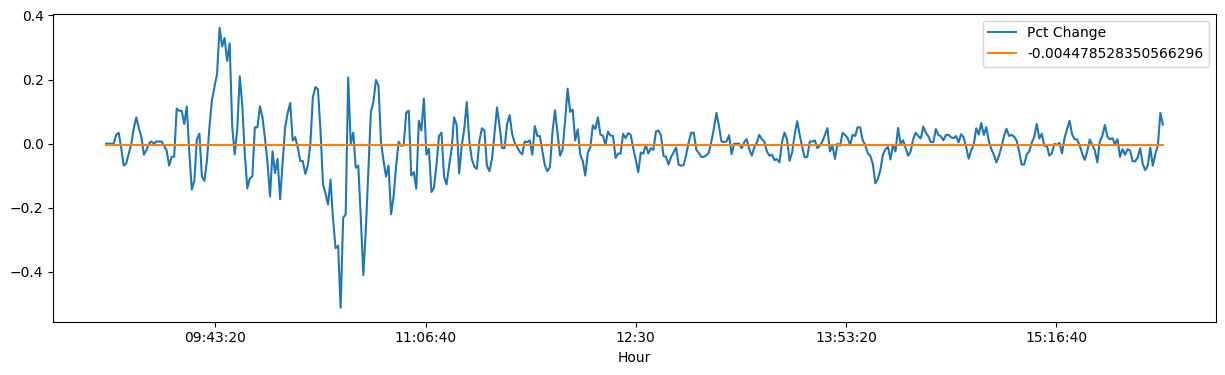

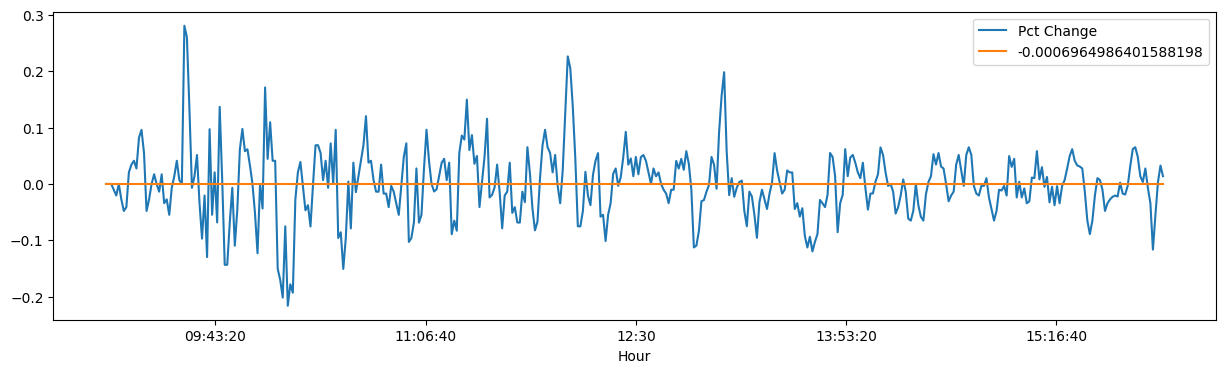

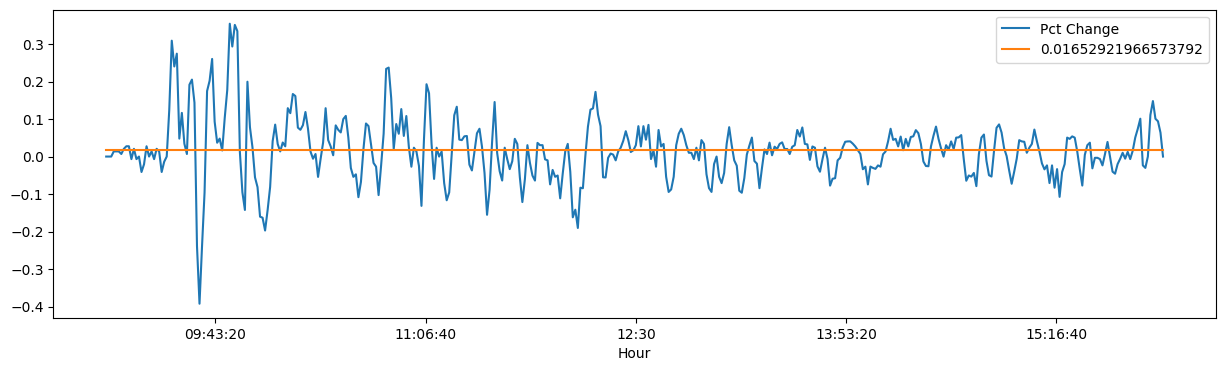

In [21]:
for tmp in aapl_days:
    day = tmp.loc[:]
    # percent change every 1 minute
    period = 3
    current = day.loc[:, 'Open']
    previous = day.loc[:, 'Open'].shift(period)
    day['Pct Change'] = (((current - previous) / previous) * 100).fillna(0)
    day['Average'] = day.loc[:,'Pct Change'].mean()

    # Calculate mean for each day and plot
    ax = day.plot('Hour', 'Pct Change')
    day.plot('Hour', 'Average', ax=ax, figsize=(15,4))
    ax.legend(['Pct Change', day['Average'][0]])

In [22]:
#for i in np.arange(start=5, stop=len(day.index), step=5):
#    print(day.iloc[i,:])

In [23]:
# Average Time to Repeat a Price
# Make every minute a variable

In [24]:
collapse = np.where(test == 148.1)[0]
collapse.size

0

In [25]:
test

Hour                 Time      Open      High  \
Day        Ticker                                                      
2021-08-02 AAPL    09:00:00  2021-08-02 09:00:00  146.3607  146.4606   
           AAPL    09:01:00  2021-08-02 09:01:00  146.4506  146.5404   
           AAPL    09:02:00  2021-08-02 09:02:00  146.5005  146.5305   
           AAPL    09:03:00  2021-08-02 09:03:00  146.5404  146.5604   
           AAPL    09:04:00  2021-08-02 09:04:00  146.5205  146.5604   
...                     ...                  ...       ...       ...   
           AAPL    15:55:00  2021-08-02 15:55:00  145.3772  145.3822   
           AAPL    15:56:00  2021-08-02 15:56:00  145.2923  145.3273   
           AAPL    15:57:00  2021-08-02 15:57:00  145.2424  145.3123   
           AAPL    15:58:00  2021-08-02 15:58:00  145.3023  145.3023   
           AAPL    15:59:00  2021-08-02 15:59:00  145.2474  145.3323   

                        Low     Close  Volume  Pct Change  
Day        Ticker                                          
2021-08-02 AAPL    146.3607  146.4606    6475         NaN  
           AAPL    146.4007  146.5005   20827    0.061424  
           AAPL    146.4805  146.5305    4227    0.034073  
           AAPL    146.5105  146.5205    3198    0.027235  
           AAPL    146.5205  146.5604    3503   -0.013580  
...                     ...       ...     ...         ...  
           AAPL    145.2873  145.2923  216938   -0.010317  
           AAPL    145.2424  145.2523  237200   -0.058400  
           AAPL    145.2324  145.3122  259082   -0.034345  
           AAPL    145.2424  145.2424  192529    0.041241  
           AAPL    145.1525  145.3023  648594   -0.037783  

[420 rows x 8 columns]

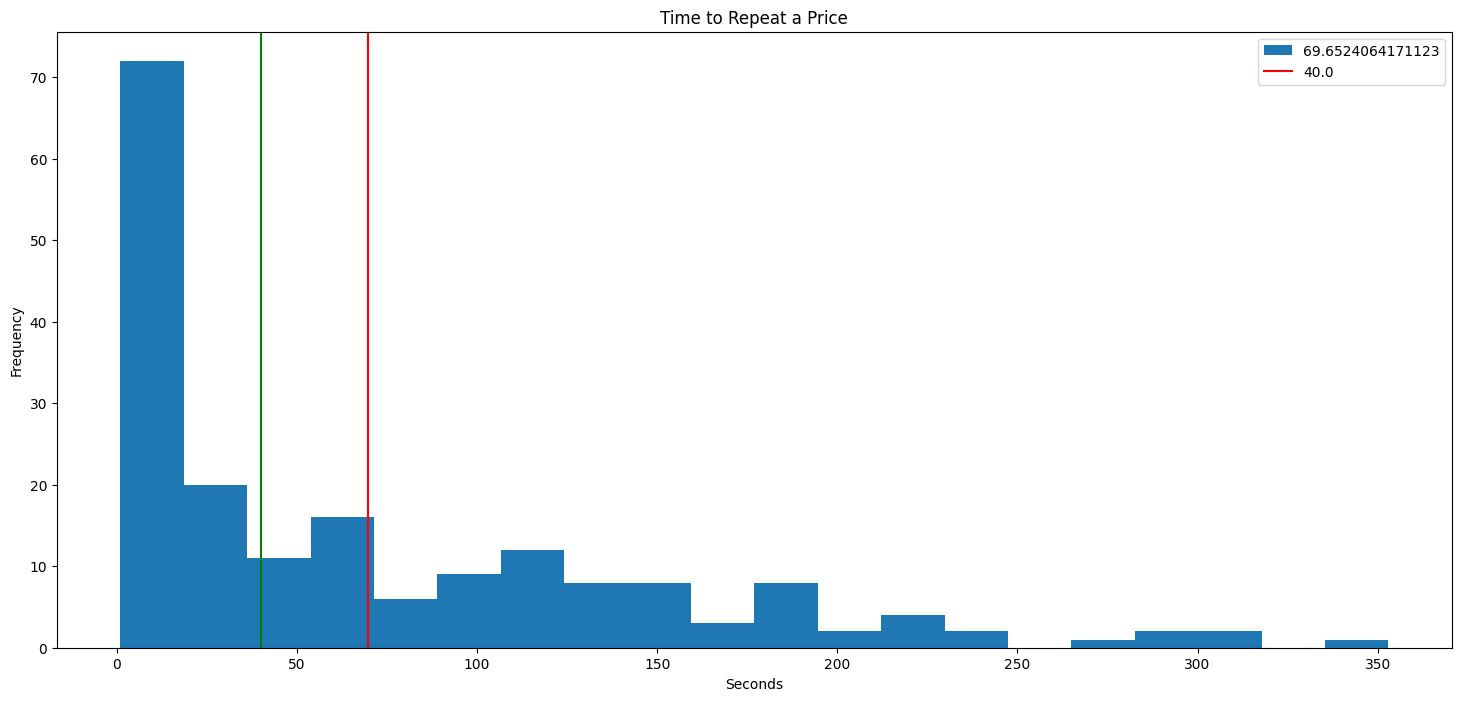

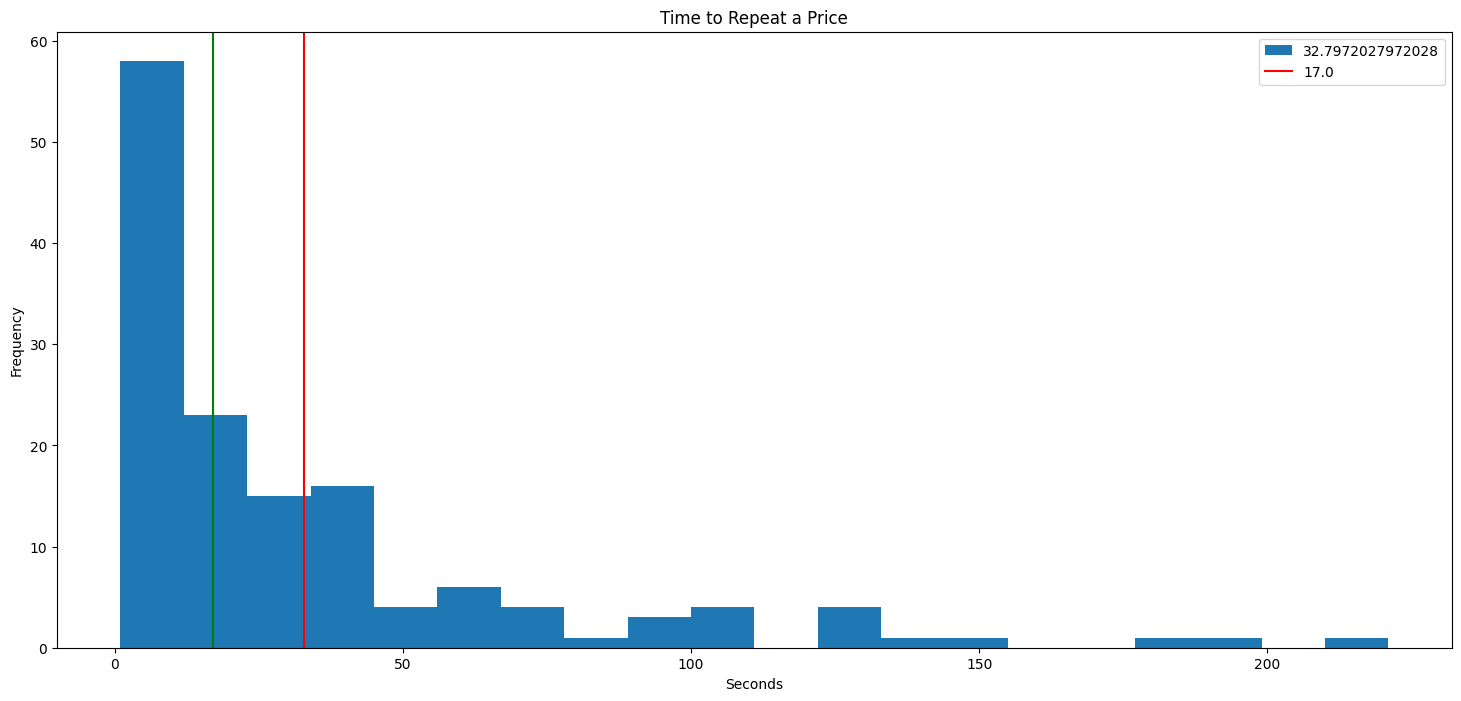

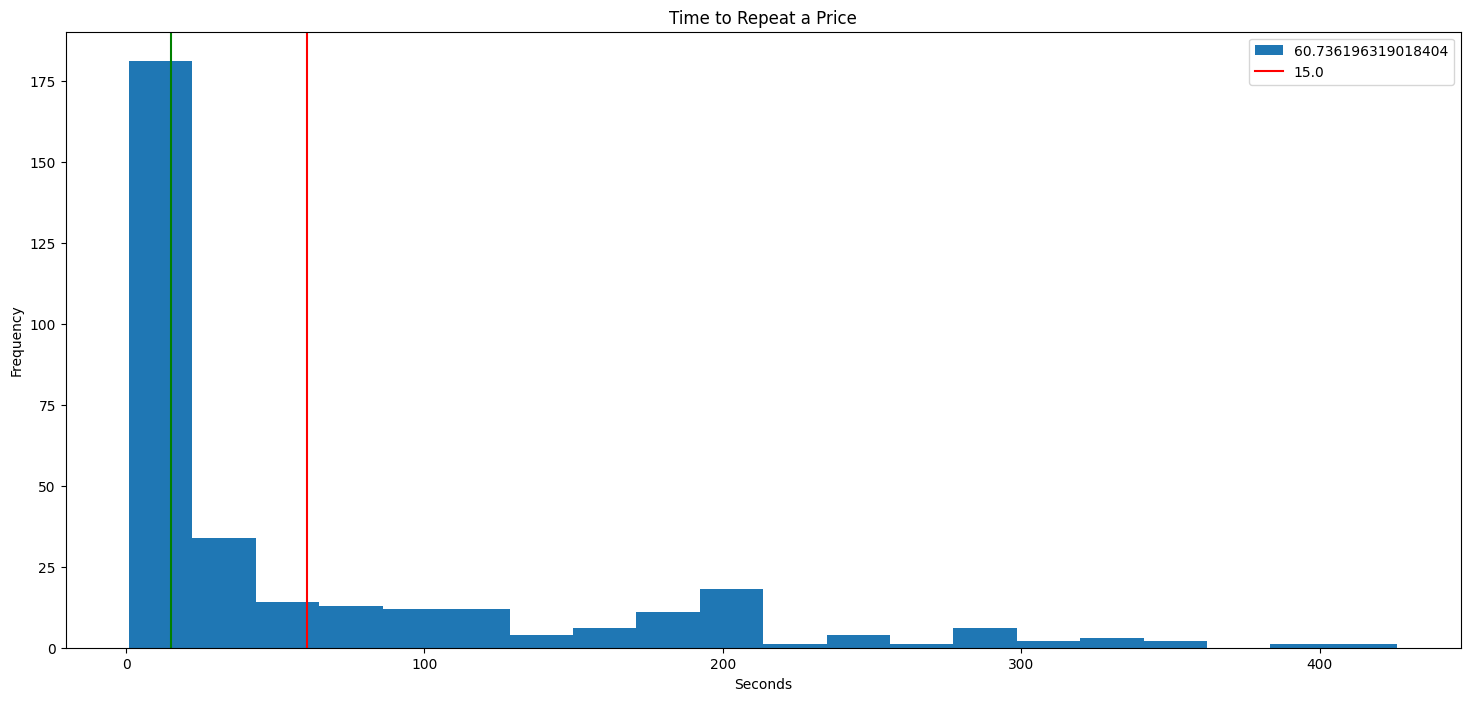

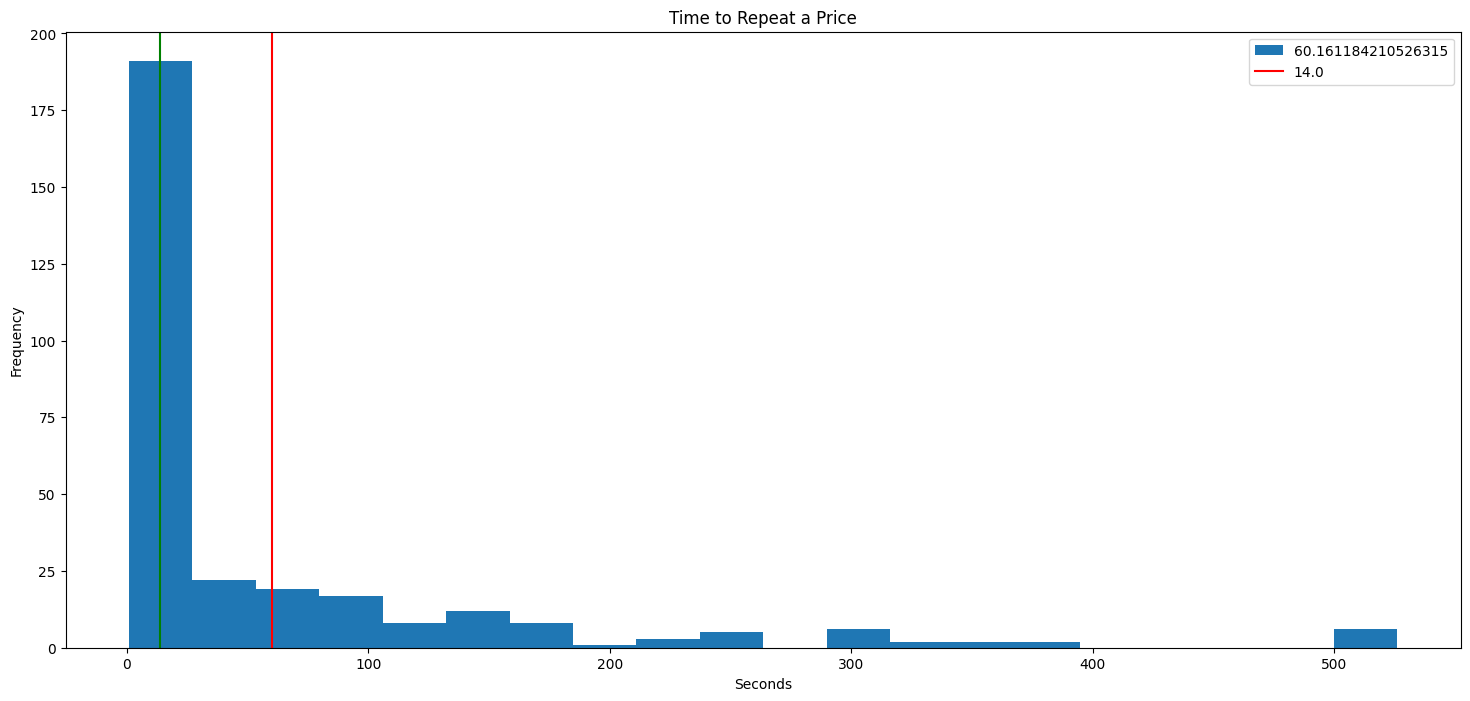

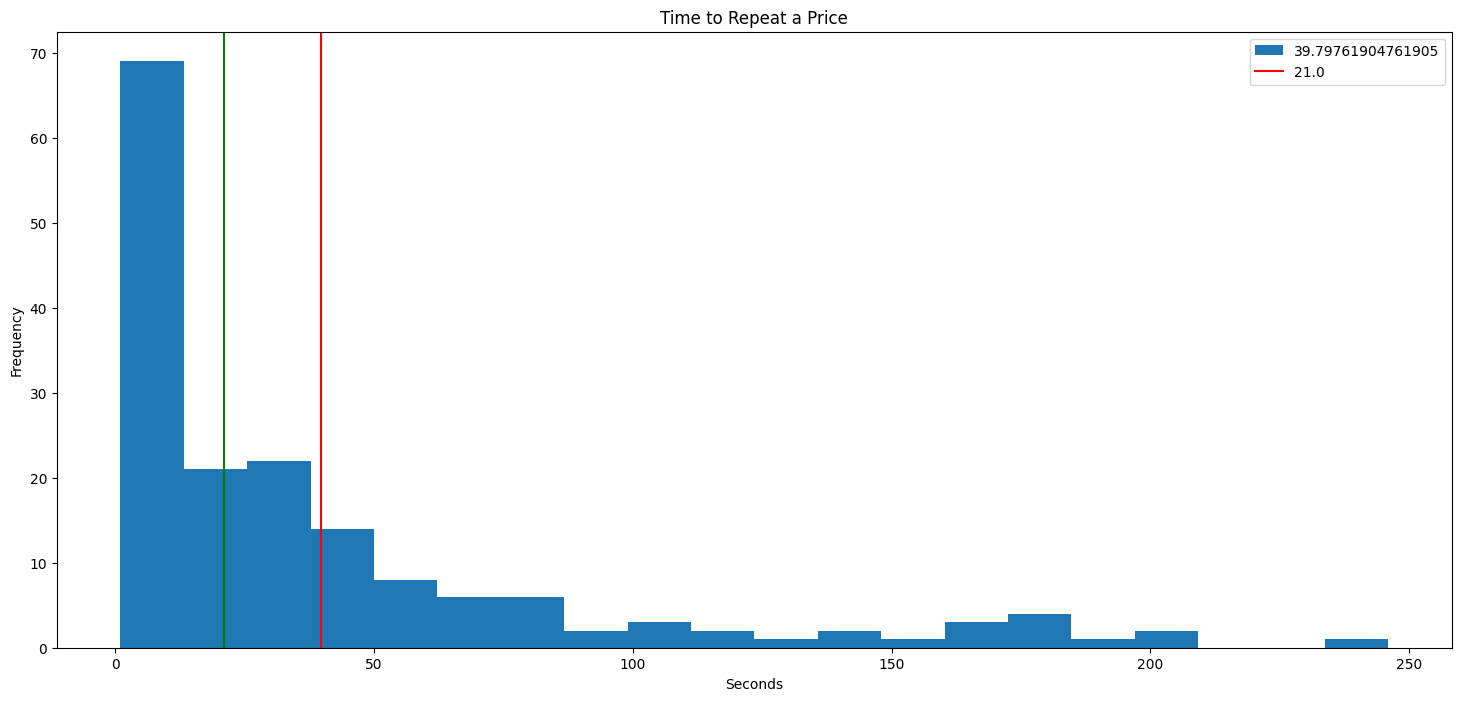

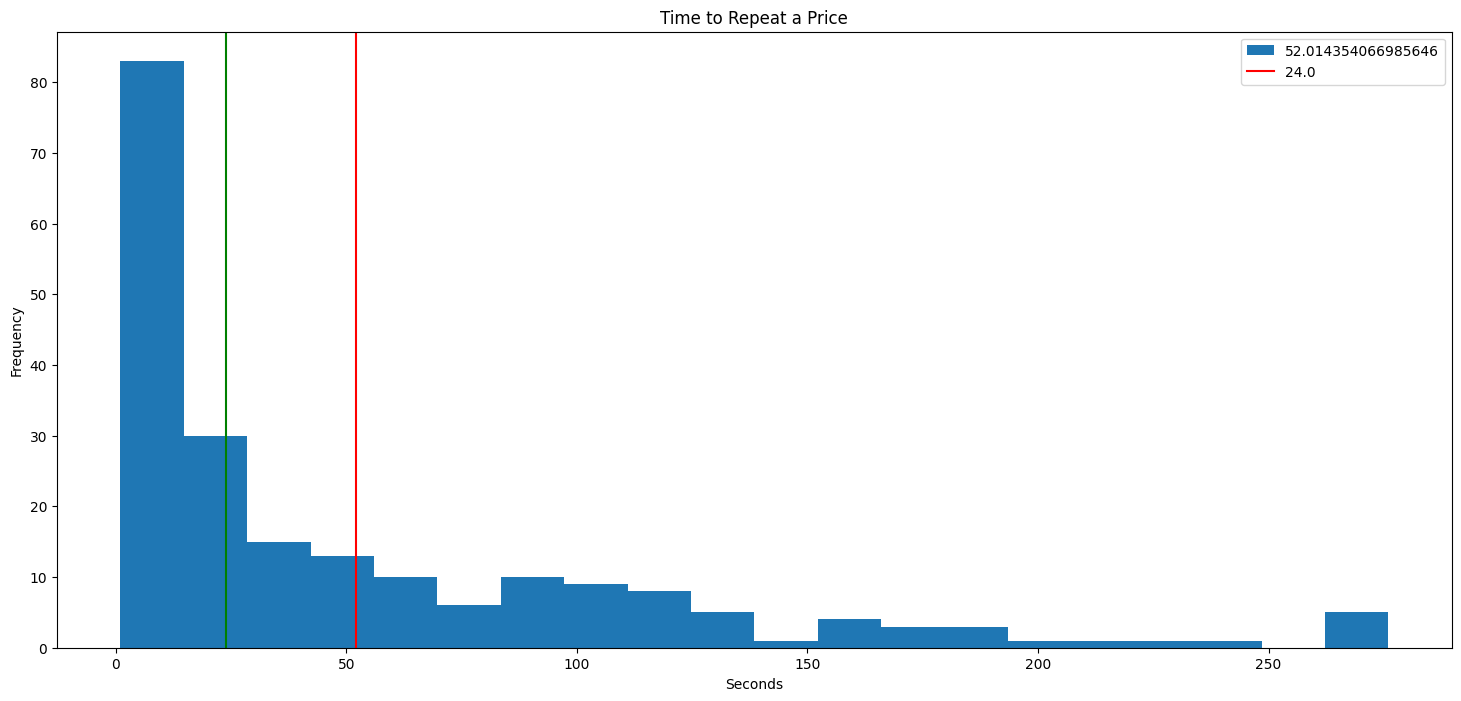

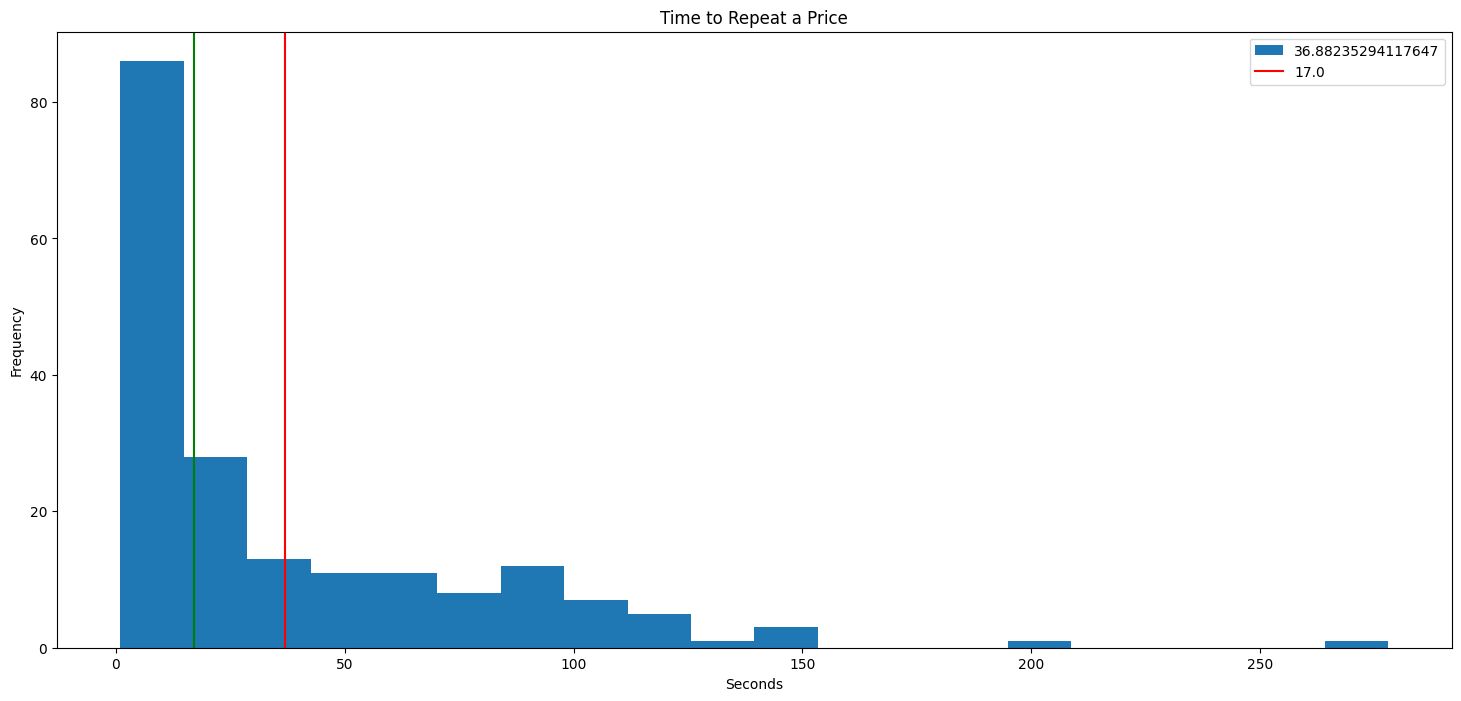

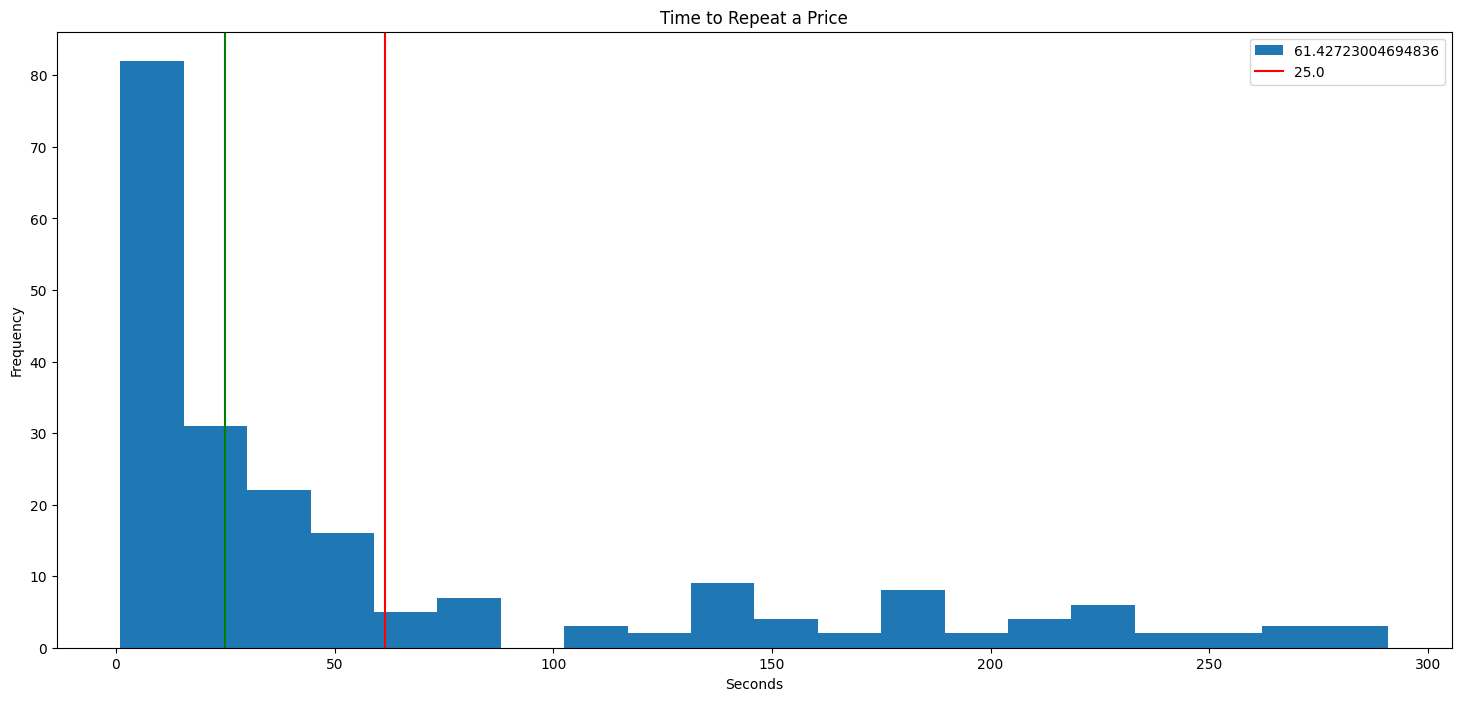

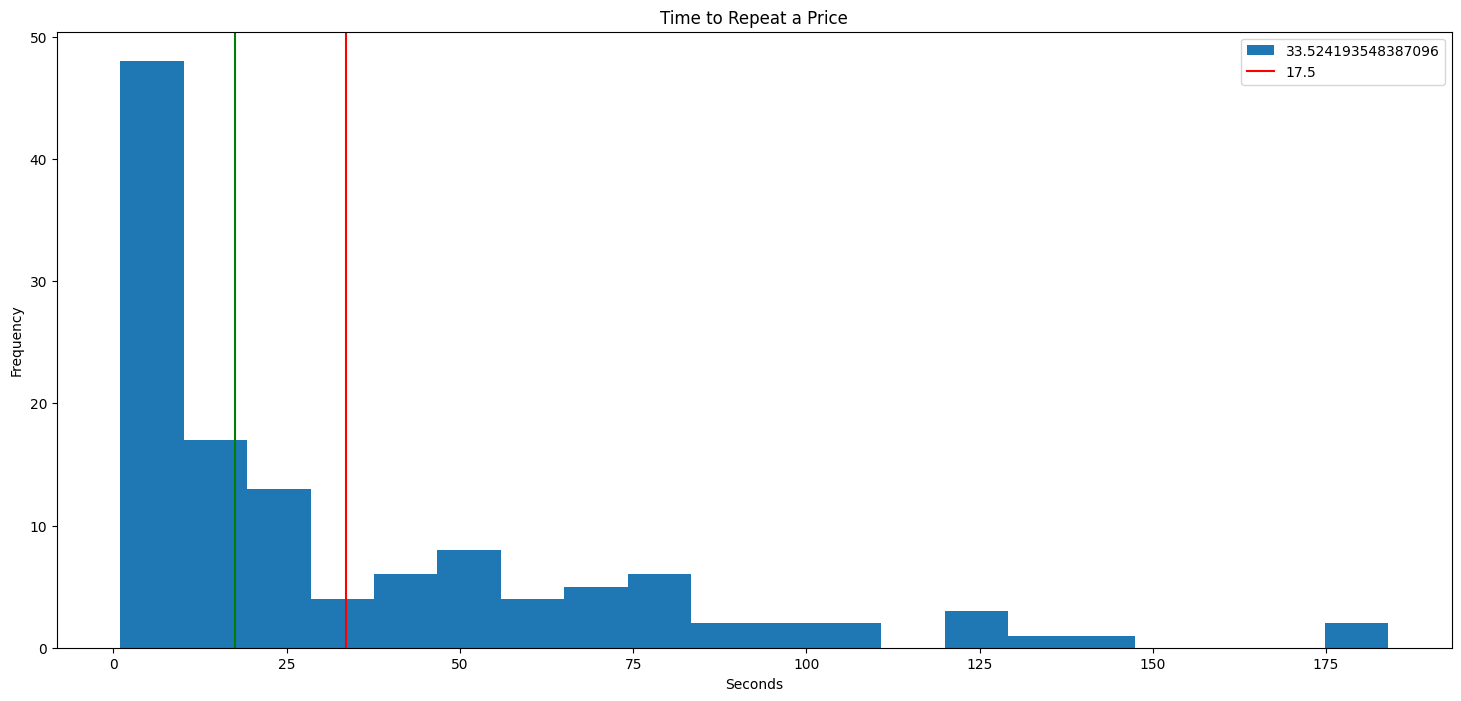

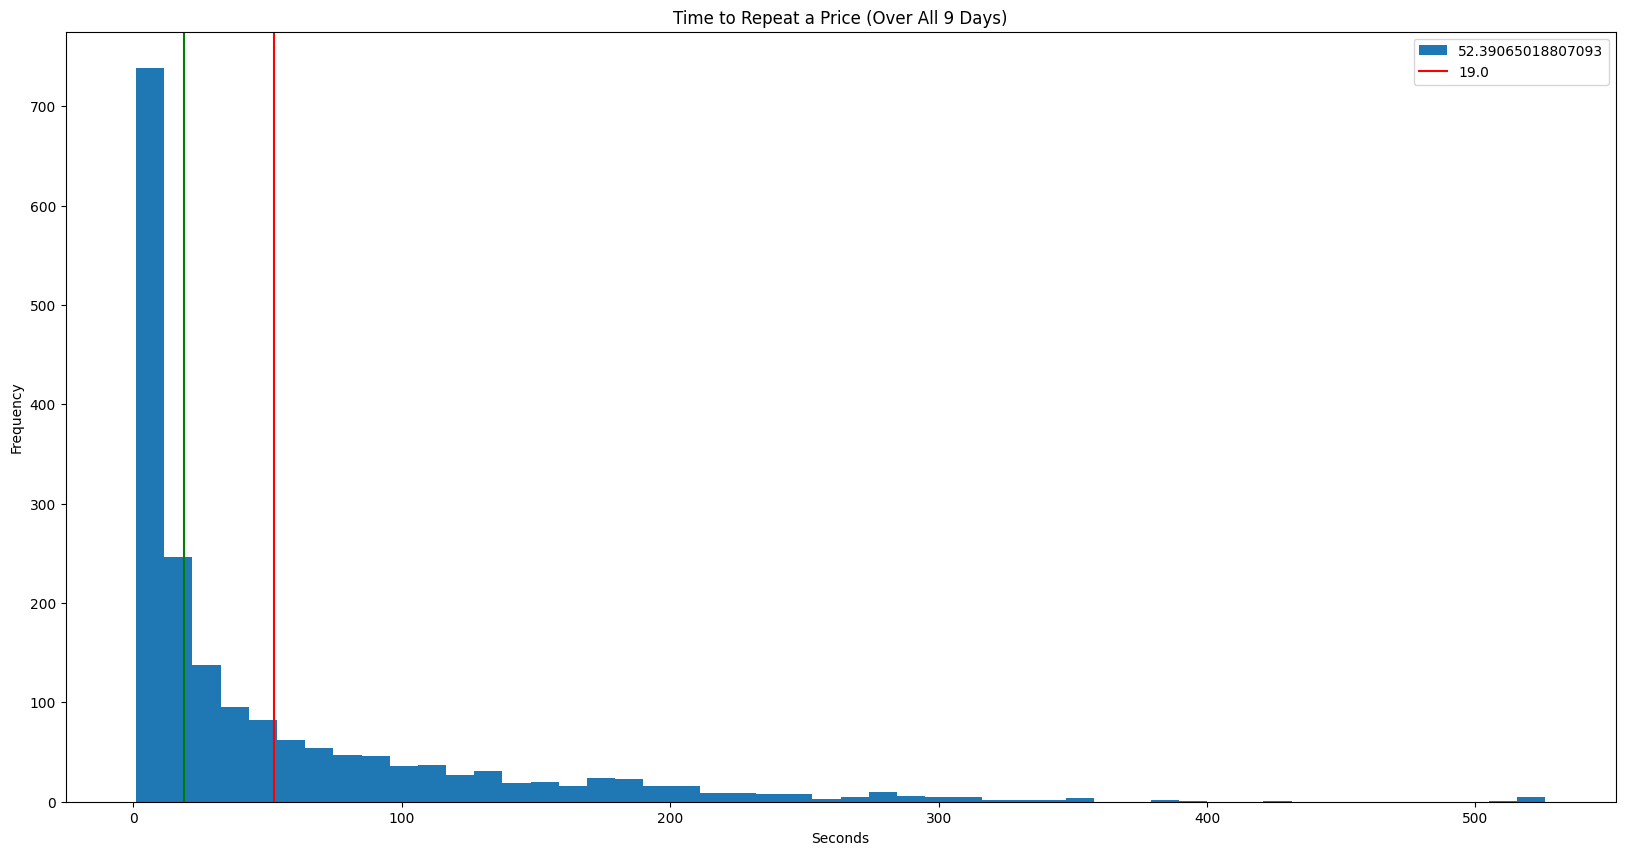

In [26]:
collated = np.array([])
for day in aapl_days:
    avg_time = []
    prices = np.array(day['Open'])
    for i in range(len(prices)):
        # get elems where the future price is within some percentage of the current price
        elem = np.where(abs(prices[i+1:] - prices[i]) == 0)[0]    # np.where creates a nested array so collapse one level
        if elem.size != 0:
            # adding one because the array shifted in the above array splicing
            avg_time.append(elem[0] + 1)
    # plot average/median time-to-repeat-price for the day
    pd.Series(data = avg_time).plot.hist(bins=20, figsize=(18,8))

    plt.axvline(np.mean(avg_time), color='red', label='Mean')
    plt.axvline(np.median(avg_time), color='green', label='Median')

    plt.legend([np.mean(avg_time), np.median(avg_time)])
    plt.title("Time to Repeat a Price")
    plt.xlabel("Seconds")

    plt.show()
    # creating master list
    collated = np.append(collated, avg_time)
# plot average/median time-to-repeat-price for all days
collated = np.ravel(collated) # .ravel flattens an array to 1D
pd.Series(data=collated).plot.hist(bins=50, figsize=(20,10))

plt.axvline(np.mean(collated),color='red', label='Mean')
plt.axvline(np.median(collated), color='green', label='Median')

plt.legend([np.mean(collated), np.median(collated)])
plt.title("Time to Repeat a Price (Over All 9 Days)")
plt.xlabel("Seconds")

plt.show()

In [27]:
aapl_days
# consistently predict the direction the price is going and sell at a profit
# if price decreases within

[                       Hour                 Time      Open      High  \
 Day        Ticker                                                      
 2021-08-02 AAPL    09:00:00  2021-08-02 09:00:00  146.3607  146.4606   
            AAPL    09:01:00  2021-08-02 09:01:00  146.4506  146.5404   
            AAPL    09:02:00  2021-08-02 09:02:00  146.5005  146.5305   
            AAPL    09:03:00  2021-08-02 09:03:00  146.5404  146.5604   
            AAPL    09:04:00  2021-08-02 09:04:00  146.5205  146.5604   
 ...                     ...                  ...       ...       ...   
            AAPL    15:55:00  2021-08-02 15:55:00  145.3772  145.3822   
            AAPL    15:56:00  2021-08-02 15:56:00  145.2923  145.3273   
            AAPL    15:57:00  2021-08-02 15:57:00  145.2424  145.3123   
            AAPL    15:58:00  2021-08-02 15:58:00  145.3023  145.3023   
            AAPL    15:59:00  2021-08-02 15:59:00  145.2474  145.3323   
 
                         Low     Close  Volume  P

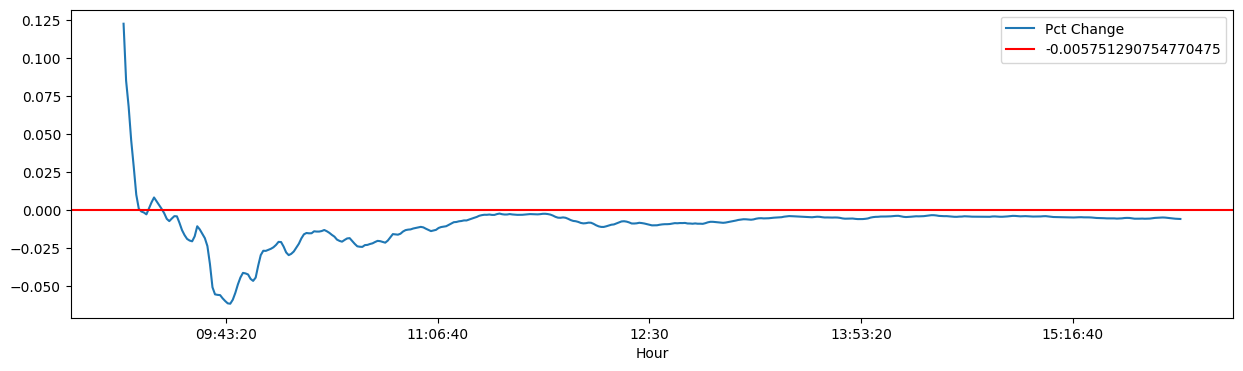

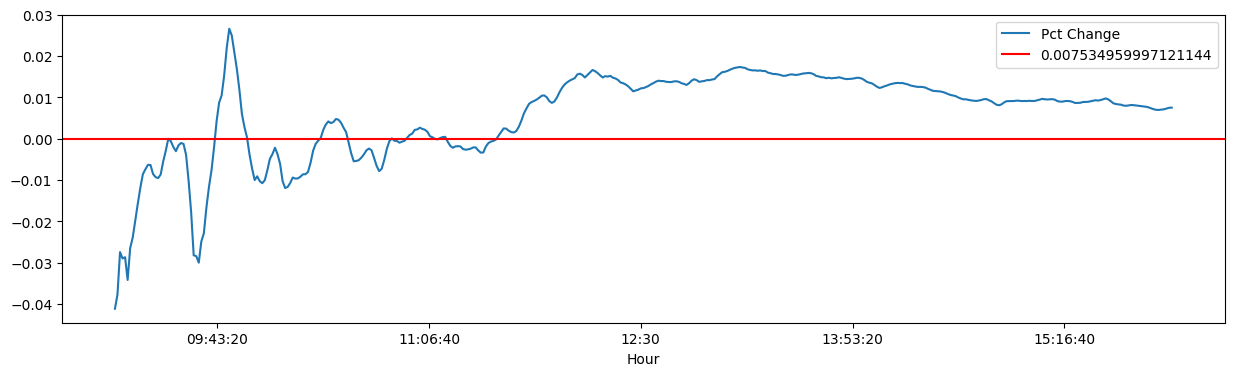

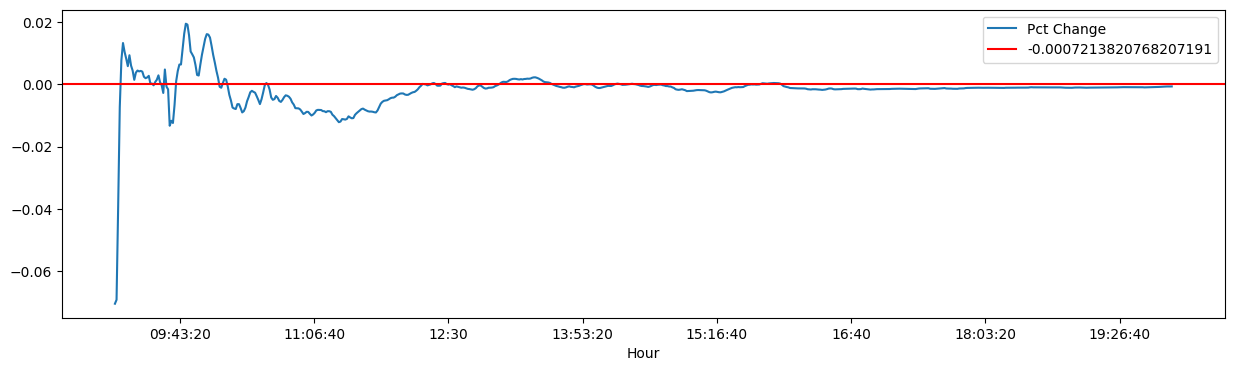

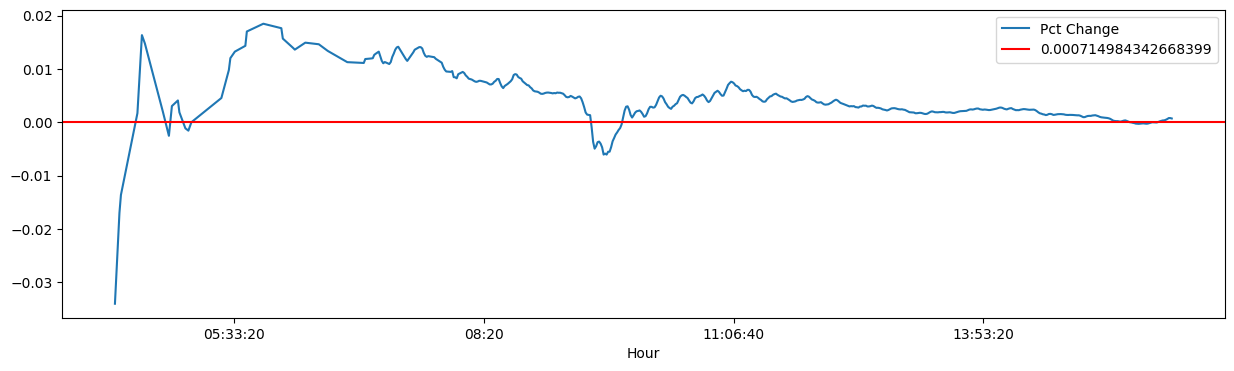

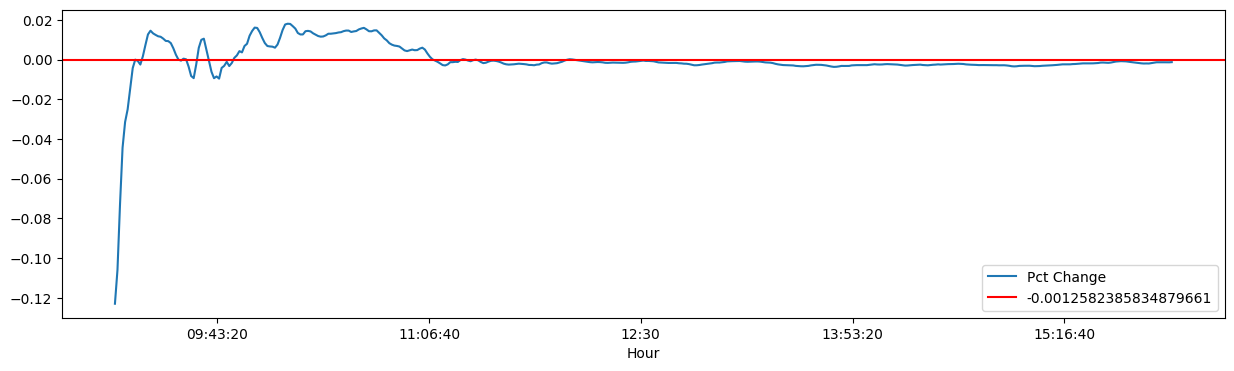

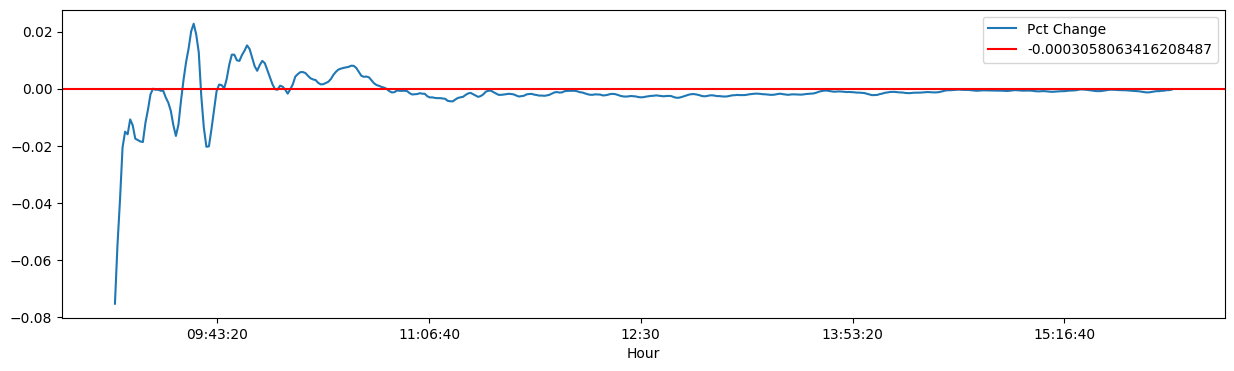

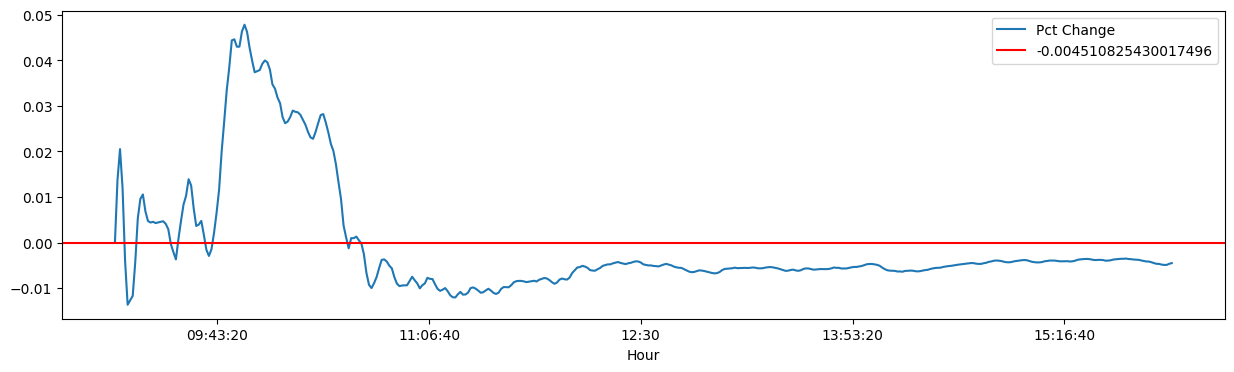

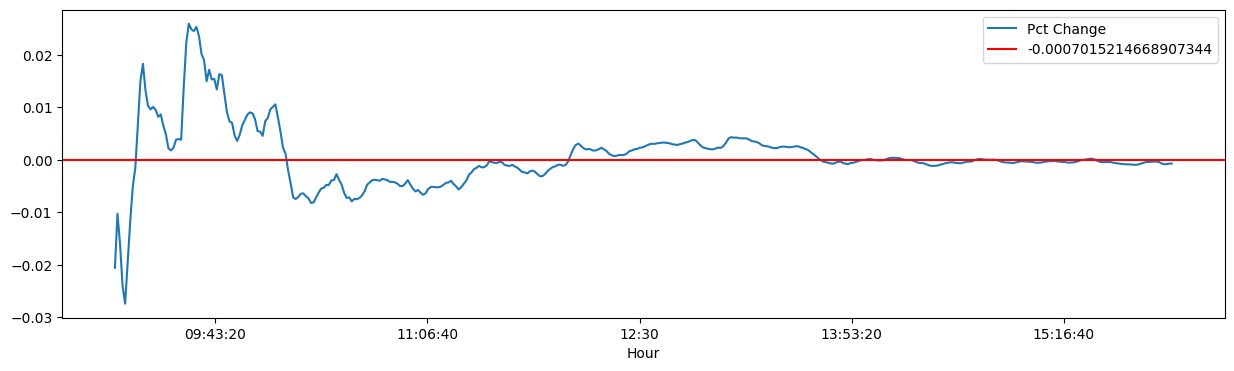

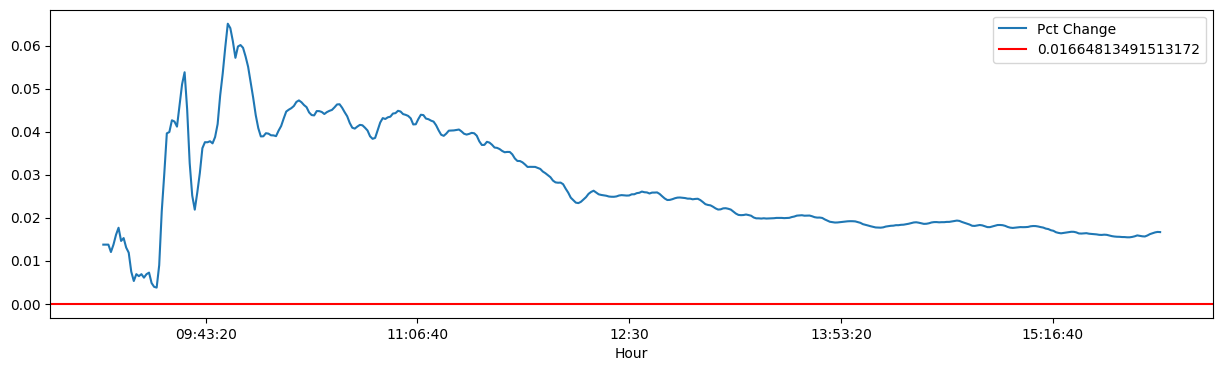

In [28]:
day = []
for tmp in aapl_days:
    # percent change every 1 minute
    day = tmp.loc[:]
    period = 3
    current = day['Open']
    previous = day['Open'].shift(period)
    day['Pct Change'] = (((current - previous) / previous) * 100)#.fillna(0)
    day['Average'] = day['Pct Change'].mean()
    day['Rolling Mean'] = day['Pct Change'].expanding().mean()
    

    # Calculate mean for each day and plot
    ax = day.plot('Hour', ['Rolling Mean'], figsize=(15,4))
    #day.plot('Hour', ['Average'], ax=ax, figsize=(15,4))
    ax.axhline(0,color='red')
    ax.legend(['Pct Change', day['Average'][0]])

In [29]:
# finds rows that are .001 percent away from a price
percent =  0.001
def close(df):
    return df.query('(1-@percent) * @price <= Open <= (1+@percent)*@price')

In [30]:
close(day)

UndefinedVariableError: local variable 'price' is not defined

In [ ]:
(day.Open <= 1+percent*price)

In [ ]:
(1+percent)*price

In [ ]:
day